In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde 
from diagram_estimations import draw_mm_diagrams, draw_mle_diagrams, draw_ls_diagrams, draw_hist_kde

df = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

fire_size_classes = pd.unique(df['fire_size_class'])
property = 'fire_size'
s_c = 'C'

dfo = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
columns_suffix = [7, 15, 30]

weather_columns = [ x + str(y) for x in cont_columns_prefix for y in columns_suffix]

def preprocess_missing_weather_data(df):
    df_subsample = df[df['Temp_pre_7'] == -1]
    df_clean = df[df['Temp_pre_7'] != -1]
    mean_weather_data = df_clean.groupby(['state', 'discovery_month'])[weather_columns].mean().reset_index()
    df_subsample.drop(weather_columns, axis=1, inplace=True)
    df_subsample = df_subsample.merge(mean_weather_data)
    df_clean = df_clean.append(df_subsample, ignore_index=True)
    #new invalid field - Humidity 0 is impossible on Earth
    df_clean = df_clean.drop(df_clean.loc[df_clean.Hum_pre_7 == 0].index).reset_index()
    return df_clean

df = preprocess_missing_weather_data(dfo)

df_sampled = df.loc[df['fire_size_class'] == s_c]

kernel = gaussian_kde(df_sampled[property])
min_amount, max_amount = df_sampled[property].min(), df_sampled[property].max()
x = np.linspace(0, max_amount, num=20)
kde_values = kernel(x)


/home/patrik-sh/Documents/ITMO_Classes/Multivariate/tasks/Task1/venv/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


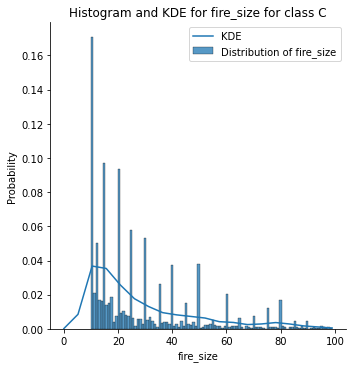

In [8]:
draw_hist_kde(df_sampled, x, s_c, property, kde_values, 100)

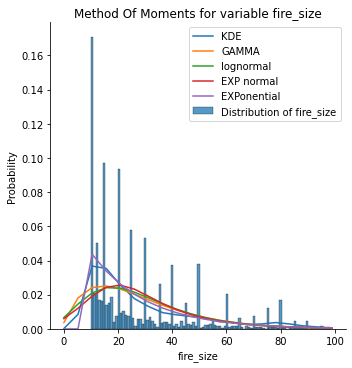

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.998021008509443, pvalue=1.697886016284007e-54), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.628798763709541, pvalue=5.997569108018297e-11)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9785583419534356, pvalue=8.437179853517467e-34), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.249781953398864, pvalue=1.7255641360236496e-11)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9701149139096458, pvalue=6.458329826636665e-31), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.089255448485892, pvalue=9.66460245166445e-12)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.666666666666666, pvalue=6.738543056883373e-11)


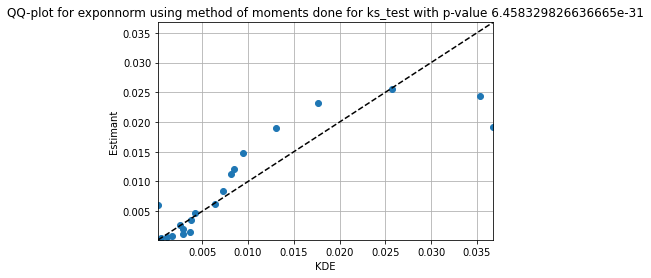

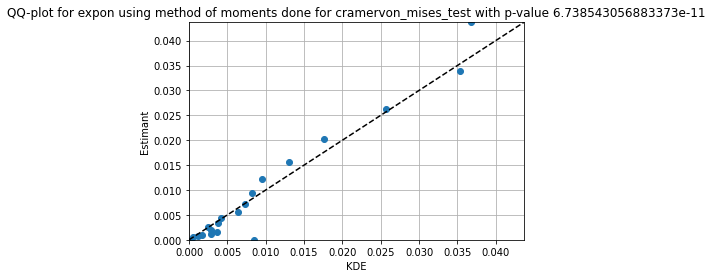

In [9]:
draw_mm_diagrams(df_sampled, x, s_c, property, kde_values, 100)

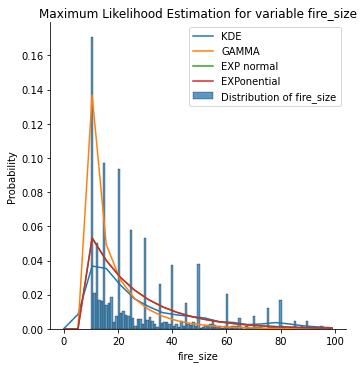

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.666666666666666, pvalue=6.738543056883373e-11)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.666666666666666, pvalue=6.738543056883373e-11)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.666666666666666, pvalue=6.738543056883373e-11)


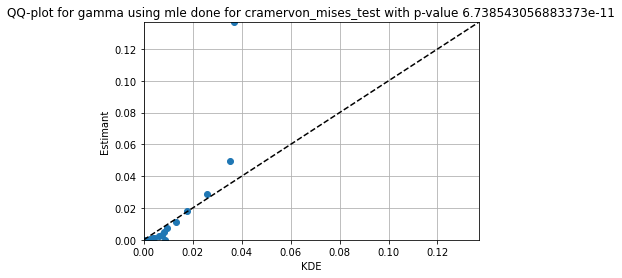

In [10]:
draw_mle_diagrams(df_sampled, x, s_c, property, kde_values, 100)

[1.71152374e-05 2.82571685e+01 2.04140994e+01]
[ 6.74168339 21.38817694 20.36161868]


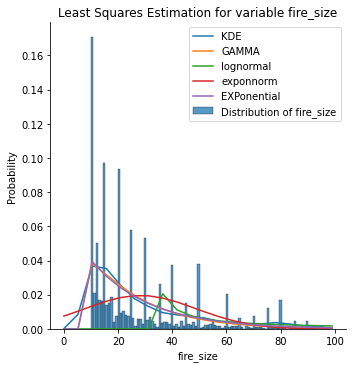

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.666666666666666, pvalue=6.738543056883373e-11)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.666666666666666, pvalue=6.738543056883373e-11)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9165779373555476, pvalue=5.329066928037601e-22), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=5.140015874421881, pvalue=6.893330350976612e-11)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.666666666666666, pvalue=6.738543056883373e-11)


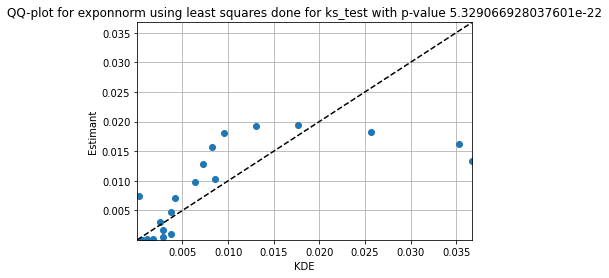

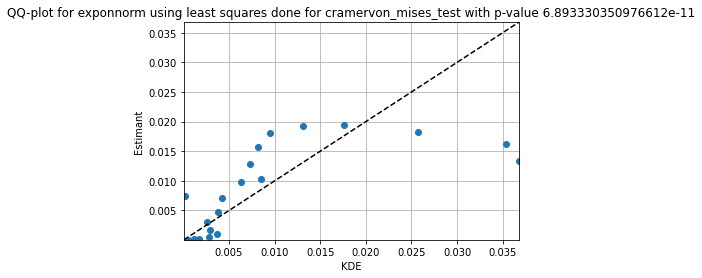

In [11]:
draw_ls_diagrams(df_sampled, x, s_c, property, kde_values, 100)

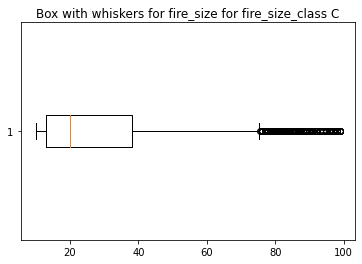

In [12]:
plt.boxplot(df_sampled[property], vert=False)
WHISKERS_FOLDER = './figures/whiskers/'
plt.title(f'Box with whiskers for {property} for fire_size_class {s_c}')
plt.savefig(f'{WHISKERS_FOLDER}whiskers_{property}_{s_c}.png')
plt.show()